In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import librosa
import librosa.display
from os import mkdir,listdir
from os.path import exists
import python_speech_features
from scipy.signal.windows import hamming
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

In [34]:
def create_dir(dir_path):
    try:
        print("Criando pasta: " + dir_path)
        mkdir(dir_path)
    except OSError as error:
        print(error)
        print() 

In [35]:
def path_to_save_func(audio_path, complemento, pasta = None):

    if pasta != None:
        path_pasta = audio_path + "/" + pasta
        if not exists(path_pasta):
            create_dir(path_pasta)

    splited = audio_path.split("/")
    file_name = splited[-1].replace(".wav", "")
    path_to_save = "/".join(splited[:len(splited) - 1]) + "/" + file_name + "_" + complemento + ".wav"
    print(path_to_save)
    return path_to_save

In [36]:
def calcular_zcr(audio_path):
    # Carregar o arquivo de áudio
    y, sr = librosa.load(audio_path, sr=None)

    # Calcular o Zero-Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    print("total de janelas ", len(zcr[0]))

    # Mostrar resultados
    #print("Zero-Crossing Rate (primeiras janelas):", zcr[:, :5])  # Primeiras 5 janelas

    # Criar eixo do tempo
    #frames = range(len(zcr[0]))
    #t = librosa.frames_to_time(frames, sr=sr)

    # Plotar
    #plt.figure(figsize=(10, 4))
    #plt.plot(t, zcr[0], label="ZCR")
    #plt.xlabel("Tempo (s)")
    #plt.ylabel("Zero-Crossing Rate")
    #plt.title("Zero-Crossing Rate ao longo do tempo")
    #plt.legend()
    #plt.show()

calcular_zcr("D:/mestrado/separacao_svd_a_3_tons_aumentado/disfonia/masculino/916-disfonia_m_a_alto.wav")



total de janelas  158


RMSE (primeiras janelas): [[0.0861834  0.10561967 0.11593463 0.11307562 0.11699605]]
total de janelas  158


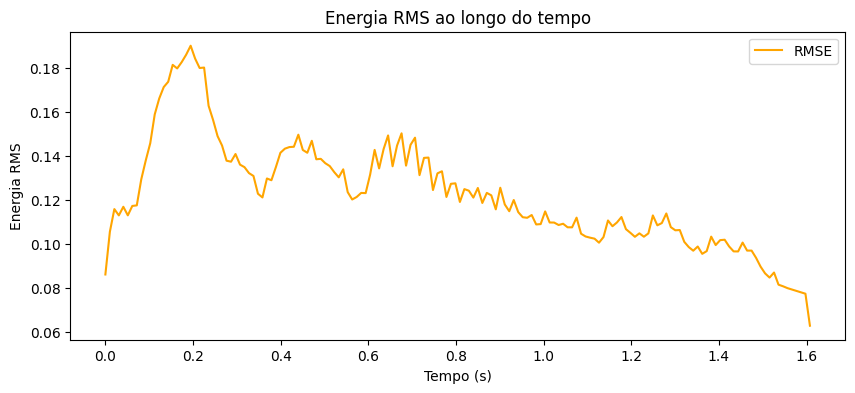

In [37]:
# Carregar o arquivo de áudio
audio_path = "D:/mestrado/separacao_svd_a_3_tons_aumentado/disfonia/masculino/916-disfonia_m_a_alto.wav"
y, sr = librosa.load(audio_path, sr=None)

# Calcular o Root-Mean-Square Energy
# Por padrão, usa janelas (frames) com tamanho de 2048 amostras e um hop size (passo entre janelas) de 512 amostras.
# Mais preciso recebendo um espectrograma ao invés do sinal. Para passar o espectrograma usar: S=
rmse = librosa.feature.rms(y=y)

# Mostrar algumas janelas de RMSE
print("RMSE (primeiras janelas):", rmse[:, :5])
print("total de janelas ", len(rmse[0]))

# Criar eixo do tempo para o RMSE
frames = range(len(rmse[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Plotar RMSE
plt.figure(figsize=(10, 4))
plt.plot(t, rmse[0], label="RMSE", color='orange')
plt.xlabel("Tempo (s)")
plt.ylabel("Energia RMS")
plt.title("Energia RMS ao longo do tempo")
plt.legend()
plt.show()


In [38]:
def extract_train_features_python_speech(audio_path):
    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(audio_path, sr=None)

    # Definir o número de frames desejado
    num_frames_desejado = 158

    # Definir winlen (tamanho da janela, em segundos)
    winlen = 0.025  # 25ms (típico)

    # Calcular o número de frames baseado no winlen e winstep
    audio_duracao = len(X) / sr  # Duração total do áudio em segundos

    # Cálculo de winstep para obter o número desejado de frames
    winstep = (audio_duracao - winlen) / (num_frames_desejado - 1)

    feature_mfcc = python_speech_features.mfcc(signal=X, samplerate=sample_rate, winlen=winlen, winstep=winstep,
                                       numcep=20, nfft=2048, highfreq=None, preemph=0.97, ceplifter=0, appendEnergy=True, winfunc=hamming)
    
    feature_mfcc = feature_mfcc.T
    feature_mfcc = np.asarray(feature_mfcc)

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series
    mfccs = np.mean(feature_mfcc,axis=0)
    print("tamanho mfccs ", len(mfccs))

    return mfccs

extract_train_features_python_speech("D:/mestrado/separacao_svd_a_3_tons_aumentado/disfonia/masculino/916-disfonia_m_a_alto.wav")

tamanho mfccs  158


array([0.0053736 , 0.08395132, 0.06715991, 0.06615047, 0.09396381,
       0.08513389, 0.10060981, 0.09308726, 0.09392944, 0.10078346,
       0.08458687, 0.08249502, 0.05985162, 0.05090416, 0.04188893,
       0.04967666, 0.03789128, 0.03064373, 0.02283004, 0.02225744,
       0.03463989, 0.04311033, 0.0656664 , 0.08560418, 0.06990028,
       0.07524421, 0.05959771, 0.06416686, 0.07418155, 0.05461528,
       0.05533117, 0.03303096, 0.05094867, 0.08243602, 0.10925878,
       0.09218486, 0.08461015, 0.06362348, 0.04403356, 0.04900173,
       0.05059288, 0.02787238, 0.03779578, 0.04372898, 0.05059901,
       0.04285114, 0.06233655, 0.06872122, 0.06483429, 0.07157569,
       0.08103402, 0.08522721, 0.04937446, 0.05727783, 0.04262019,
       0.02369098, 0.06076567, 0.04356915, 0.02415174, 0.07325611,
       0.00695193, 0.05247298, 0.0976417 , 0.05197883, 0.07490529,
       0.11223387, 0.08365979, 0.08676801, 0.1197595 , 0.10727932,
       0.10619477, 0.12040304, 0.07310111, 0.11338133, 0.12948

In [40]:
# Extrai o RMSE, ZCR e os 20 Coeficientes MFCCC do áudio
# Return: Pandas Dataframe cujas linhas são os frames do áudio
def extract_features(audio_path):
    # Carregar o áudio
    audio_name = audio_path.split("/")[-1].replace(".wav", "")
    y, sr = librosa.load(audio_path, sr=None)

    # Calcular RMSE e ZCR
    rmse = librosa.feature.rms(y=y)[0]  # [0] para converter de matriz para vetor
    zcr = librosa.feature.zero_crossing_rate(y)[0]

    num_frames_desejado = len(rmse)
    winlen = 0.025  # 25ms (típico)
    audio_duracao = len(y) / sr
    winstep = (audio_duracao - winlen) / (num_frames_desejado - 1)
    n_fft = int(winlen * sr)
    print('n_fft ', n_fft)

    num_cep = 20
    feature_mfcc = python_speech_features.mfcc(signal=y, samplerate=sr, winlen=winlen, winstep=winstep,
                                        numcep=num_cep, nfft=n_fft, highfreq=None, preemph=0.97, ceplifter=0, appendEnergy=True, winfunc=hamming)

    feature_mfcc = np.asarray(feature_mfcc)

    print('Áudio ', audio_name, ' com tamanho de rmse: ', len(rmse))
    print('Áudio ', audio_name, ' com tamanho de zcr: ', len(zcr))
    print('Áudio ', audio_name, ' com tamanho de feature_mfcc: ', len(feature_mfcc))

    # Criar um Pandas DataFrame
    df_rz = pd.DataFrame({
        'RMSE': rmse,
        'ZCR': zcr
    })

    df_mfccs = pd.DataFrame(feature_mfcc)
    df_mfccs.columns = [f"COEF_{i+1}" for i in range(feature_mfcc.shape[1])]

    df_metricas = pd.concat([df_rz, df_mfccs.reindex(df_rz.index)], axis=1)
    df_metricas['Audio'] = audio_name
    df_metricas['Label Binario'] = 'saudavel' if 'saudavel' in audio_name else 'patologico'

    categoria = None
    if 'disfonia' in audio_name:
        categoria = 'disfonia'
    elif 'laringite' in audio_name:
        categoria = 'laringite'
    elif 'paralisia' in audio_name:
        categoria = 'paralisia'
    elif 'polipo' in audio_name:
        categoria = 'polipo'
    elif 'saudavel' in audio_name:
        categoria = 'saudavel'

    df_metricas['Label Multiclasse'] = categoria

    print('df_rz shape ', df_rz.shape)
    print('df_mfccs shape ', df_mfccs.shape)

    # Exibir as primeiras linhas do DataFrame
    print()

    colunas_nan_df_rz = df_rz.columns[df_rz.isna().any()].tolist()
    print('Colunas NaN df_rz: ', colunas_nan_df_rz)
    colunas_nan_df_mfccs = df_mfccs.columns[df_mfccs.isna().any()].tolist()
    print('Colunas NaN df_mfccs: ', colunas_nan_df_mfccs)
    colunas_nan_df_metricas = df_metricas.columns[df_metricas.isna().any()].tolist()
    print('Colunas NaN df_metricas: ', colunas_nan_df_metricas)

    print()
    print('Áudio ', audio_name, ' processado!')
    print('------------------------------------------------------------------------')
    return df_metricas


In [41]:
path_csvs = "D:/mestrado/notebooks/dados/features_csv"
cols_to_scale = ['RMSE', 'ZCR', 'COEF_1', 'COEF_2', 'COEF_3', 'COEF_4', 'COEF_5', 'COEF_6', 'COEF_7', 'COEF_8', 'COEF_9', 'COEF_10', 'COEF_11', 'COEF_12', 'COEF_13', 'COEF_14', 'COEF_15', 'COEF_16', 'COEF_17', 'COEF_18', 'COEF_19', 'COEF_20']

---

In [42]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/saudavel/masculino"

count = 0
for file in listdir(path_database):
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_masculino_saudavel =  audio_features_df
    else:
        df_masculino_saudavel = pd.concat([df_masculino_saudavel, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_masculino_saudavel possui NaN? ")
print(df_masculino_saudavel.isna().any())

df_masculino_saudavel.to_csv(path_csvs + "/" + "masculino_saudavel" + '.csv', sep=";", index=False)

n_fft  1250
Áudio  694-saudavel_m_a_alto  com tamanho de rmse:  128
Áudio  694-saudavel_m_a_alto  com tamanho de zcr:  128
Áudio  694-saudavel_m_a_alto  com tamanho de feature_mfcc:  128
df_rz shape  (128, 2)
df_mfccs shape  (128, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  694-saudavel_m_a_alto  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  4-saudavel_m_a_neutro  com tamanho de rmse:  171
Áudio  4-saudavel_m_a_neutro  com tamanho de zcr:  171
Áudio  4-saudavel_m_a_neutro  com tamanho de feature_mfcc:  171
df_rz shape  (171, 2)
df_mfccs shape  (171, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  4-saudavel_m_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  5-saudavel_m_a_neutro  com tamanho de rmse:  132
Áudio  5-saudavel_m_a_neutro  com tamanho de zcr:  132
Áudio  5-saudavel

In [43]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/saudavel/masculino"

count = 0
for file in listdir(path_database):
    if count == 250: 
        break

    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_masculino_saudavel_250 =  audio_features_df
    else:
        df_masculino_saudavel_250 = pd.concat([df_masculino_saudavel_250, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_masculino_saudavel_250 possui NaN? ")
print(df_masculino_saudavel_250.isna().any())

n_fft  1250
Áudio  694-saudavel_m_a_alto  com tamanho de rmse:  128
Áudio  694-saudavel_m_a_alto  com tamanho de zcr:  128
Áudio  694-saudavel_m_a_alto  com tamanho de feature_mfcc:  128
df_rz shape  (128, 2)
df_mfccs shape  (128, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  694-saudavel_m_a_alto  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  4-saudavel_m_a_neutro  com tamanho de rmse:  171
Áudio  4-saudavel_m_a_neutro  com tamanho de zcr:  171
Áudio  4-saudavel_m_a_neutro  com tamanho de feature_mfcc:  171
df_rz shape  (171, 2)
df_mfccs shape  (171, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  4-saudavel_m_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  5-saudavel_m_a_neutro  com tamanho de rmse:  132
Áudio  5-saudavel_m_a_neutro  com tamanho de zcr:  132
Áudio  5-saudavel

In [44]:
print(len(pd.unique(df_masculino_saudavel_250['Audio'])))
if len(pd.unique(df_masculino_saudavel_250['Audio'])) == 250:
    df_masculino_saudavel_250.to_csv(path_csvs + "/" + "masculino_saudavel_250" + '.csv', sep=";", index=False)

250


In [45]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/disfonia/masculino"

count = 0
for file in listdir(path_database):
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_masculino_disfonia =  audio_features_df
    else:
        df_masculino_disfonia = pd.concat([df_masculino_disfonia, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_masculino_disfonia possui NaN? ")
print(df_masculino_disfonia.isna().any())

df_masculino_disfonia.to_csv(path_csvs + "/" + "masculino_disfonia" + '.csv', sep=";", index=False)

n_fft  1250
Áudio  2356-disfonia_m_a_alto  com tamanho de rmse:  55
Áudio  2356-disfonia_m_a_alto  com tamanho de zcr:  55
Áudio  2356-disfonia_m_a_alto  com tamanho de feature_mfcc:  56
df_rz shape  (55, 2)
df_mfccs shape  (56, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  2356-disfonia_m_a_alto  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  2387-disfonia_m_a_alto  com tamanho de rmse:  82
Áudio  2387-disfonia_m_a_alto  com tamanho de zcr:  82
Áudio  2387-disfonia_m_a_alto  com tamanho de feature_mfcc:  82
df_rz shape  (82, 2)
df_mfccs shape  (82, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  2387-disfonia_m_a_alto  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  2436-disfonia_m_a_alto  com tamanho de rmse:  61
Áudio  2436-disfonia_m_a_alto  com tamanho de zcr:  61
Áudio  2436-disfoni

In [46]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/laringite/masculino"

count = 0
for file in listdir(path_database):
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_masculino_laringite =  audio_features_df
    else:
        df_masculino_laringite = pd.concat([df_masculino_laringite, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_masculino_laringite possui NaN? ")
print(df_masculino_laringite.isna().any())

df_masculino_laringite.to_csv(path_csvs + "/" + "masculino_laringite" + '.csv', sep=";", index=False)

n_fft  1250
Áudio  2605-laringite_m_a_neutro  com tamanho de rmse:  120
Áudio  2605-laringite_m_a_neutro  com tamanho de zcr:  120
Áudio  2605-laringite_m_a_neutro  com tamanho de feature_mfcc:  120
df_rz shape  (120, 2)
df_mfccs shape  (120, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  2605-laringite_m_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  107-laringite_m_a_neutro  com tamanho de rmse:  119
Áudio  107-laringite_m_a_neutro  com tamanho de zcr:  119
Áudio  107-laringite_m_a_neutro  com tamanho de feature_mfcc:  119
df_rz shape  (119, 2)
df_mfccs shape  (119, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  107-laringite_m_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  139-laringite_m_a_neutro  com tamanho de rmse:  155
Áudio  139-laringite_m_a_neutro  com tama

In [47]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/paralisia/masculino"

count = 0
for file in listdir(path_database):
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_masculino_paralisia =  audio_features_df
    else:
        df_masculino_paralisia = pd.concat([df_masculino_paralisia, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_masculino_paralisia possui NaN? ")
print(df_masculino_paralisia.isna().any())

df_masculino_paralisia.to_csv(path_csvs + "/" + "masculino_paralisia" + '.csv', sep=";", index=False)

n_fft  1250
Áudio  128-paralisia_m_a_neutro  com tamanho de rmse:  196
Áudio  128-paralisia_m_a_neutro  com tamanho de zcr:  196
Áudio  128-paralisia_m_a_neutro  com tamanho de feature_mfcc:  196
df_rz shape  (196, 2)
df_mfccs shape  (196, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  128-paralisia_m_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  155-paralisia_m_a_neutro  com tamanho de rmse:  140
Áudio  155-paralisia_m_a_neutro  com tamanho de zcr:  140
Áudio  155-paralisia_m_a_neutro  com tamanho de feature_mfcc:  141
df_rz shape  (140, 2)
df_mfccs shape  (141, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  155-paralisia_m_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  358-paralisia_m_a_neutro  com tamanho de rmse:  195
Áudio  358-paralisia_m_a_neutro  com tamanho 

In [48]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/polipo/masculino"

count = 0
for file in listdir(path_database):
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_masculino_polipo =  audio_features_df
    else:
        df_masculino_polipo = pd.concat([df_masculino_polipo, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_masculino_polipo possui NaN? ")
print(df_masculino_polipo.isna().any())

df_masculino_polipo.to_csv(path_csvs + "/" + "masculino_polipo" + '.csv', sep=";", index=False)

n_fft  1250
Áudio  109-polipo_m_a_alto  com tamanho de rmse:  74
Áudio  109-polipo_m_a_alto  com tamanho de zcr:  74
Áudio  109-polipo_m_a_alto  com tamanho de feature_mfcc:  74
df_rz shape  (74, 2)
df_mfccs shape  (74, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  109-polipo_m_a_alto  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  109-polipo_m_a_baixo  com tamanho de rmse:  81
Áudio  109-polipo_m_a_baixo  com tamanho de zcr:  81
Áudio  109-polipo_m_a_baixo  com tamanho de feature_mfcc:  82
df_rz shape  (81, 2)
df_mfccs shape  (82, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  109-polipo_m_a_baixo  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  109-polipo_m_a_neutro  com tamanho de rmse:  88
Áudio  109-polipo_m_a_neutro  com tamanho de zcr:  88
Áudio  109-polipo_m_a_neutro  com tamanho

In [49]:
# Lista de arquivos
arquivos = ["D:/mestrado/notebooks/dados/features_csv/masculino_disfonia.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_paralisia.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_laringite.csv",
            "D:/mestrado/notebooks/dados/features_csv/masculino_polipo.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_saudavel.csv"]

# Carregar todos os DataFrames em uma lista
dataframes = [pd.read_csv(arquivo, sep=";") for arquivo in arquivos]

# Concatenar todos os DataFrames em um único
df_unico = pd.concat(dataframes, ignore_index=True)

# Exibir o resultado
print(df_unico)
print("df_unico possui NaN? ")
print(df_unico.isna().any())


            RMSE       ZCR    COEF_1     COEF_2    COEF_3    COEF_4    COEF_5  \
0       0.252705  0.014648 -0.811520  11.235353 -5.613361 -4.034989 -4.162647   
1       0.298725  0.021973 -0.913949  10.633964 -5.945588 -4.254902 -4.575624   
2       0.352506  0.029297 -0.830677  10.670110 -6.030732 -4.165949 -4.586895   
3       0.347881  0.029297 -0.847680  11.713281 -6.681497 -3.543085 -4.630162   
4       0.347075  0.029297 -0.849806  11.503824 -6.239182 -3.510101 -4.930563   
...          ...       ...       ...        ...       ...       ...       ...   
214216  0.187499  0.163086  0.722213  -8.620114  2.915679 -0.639225 -1.201687   
214217  0.177013  0.181641  0.784807  -8.751906  3.554929 -0.810363 -1.464439   
214218  0.167193  0.193848  0.745795  -8.924123  3.119659 -1.165419 -1.875104   
214219  0.152362  0.208984  0.733838  -9.509102  3.024499 -0.542085 -1.557726   
214220  0.124479  0.161621  0.851845 -10.020549  3.010203 -0.229742 -1.199610   

          COEF_6    COEF_7 

In [50]:
df_unico.to_csv(path_csvs + "/" + "masculino_completo" + '.csv', sep=";", index=False)

In [51]:
len(pd.unique(df_unico['Audio']))

2000

In [52]:
scaler_global = MinMaxScaler(feature_range=(-1,1))
scaler_global.fit_transform(df_unico[cols_to_scale])
joblib.dump(scaler_global, path_csvs + "/" + 'scaler_global.pkl')

['D:/mestrado/notebooks/dados/features_csv/scaler_global.pkl']

In [53]:
normalized_data = df_masculino_saudavel.copy()
# Normalizando as colunas com MinMaxScaler
# normalized_data[cols_to_scale] = scaler_global.transform(df_masculino_saudavel[cols_to_scale])

scaler_masculino_saudavel = MinMaxScaler(feature_range=(-1,1))
normalized_data[cols_to_scale] = scaler_masculino_saudavel.fit_transform(df_masculino_saudavel[cols_to_scale])

normalized_data.to_csv(path_csvs + "/" + "masculino_saudavel_normalizado" + '.csv', sep=";", index=False)

# Salvar o escalador
# joblib.dump(scaler_global, path_csvs + "/" + 'scaler_masculino_saudavel.pkl')

# Carregar o escalador
#scaler = joblib.load('scaler_masculino_saudavel.pkl')

normalized_data.head()

,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.404004,-0.943925,0.394571,0.570440,-0.388568,-0.329378,-0.259232,-0.229132,0.213182,0.070605,...,0.372561,-0.132003,-0.234137,-0.246155,0.129922,0.049661,0.301799,694-saudavel_m_a_alto,saudavel,saudavel
1,-0.277641,-0.914019,0.388999,0.669205,-0.521288,-0.203397,-0.352187,-0.148282,0.182098,0.140892,...,0.287214,-0.076039,-0.245016,-0.210482,0.098637,0.103654,0.277449,694-saudavel_m_a_alto,saudavel,saudavel
2,-0.175129,-0.882243,0.380276,0.637278,-0.463117,-0.196103,-0.406928,-0.088244,0.169251,0.171639,...,0.265112,-0.091370,-0.255590,-0.174463,0.108414,0.060690,0.322818,694-saudavel_m_a_alto,saudavel,saudavel
3,-0.192242,-0.882243,0.375438,0.670245,-0.476249,-0.205932,-0.371572,-0.143509,0.238512,0.133012,...,0.265597,-0.139876,-0.262394,-0.110039,0.059280,0.060834,0.347146,694-saudavel_m_a_alto,saudavel,saudavel
4,-0.206600,-0.884112,0.366550,0.663632,-0.460405,-0.215794,-0.327250,-0.183796,0.254172,0.171449,...,0.322568,-0.166375,-0.310869,-0.045801,0.034533,0.102372,0.222161,694-saudavel_m_a_alto,saudavel,saudavel


In [54]:
normalized_data_250 = df_masculino_saudavel_250.copy()
# Normalizando as colunas com MinMaxScaler

# normalized_data_250[cols_to_scale] = scaler_global.transform(df_masculino_saudavel_250[cols_to_scale])

scaler_masculino_saudavel_250 = MinMaxScaler(feature_range=(-1,1))
normalized_data_250[cols_to_scale] = scaler_masculino_saudavel_250.fit_transform(df_masculino_saudavel_250[cols_to_scale])

normalized_data_250.to_csv(path_csvs + "/" + "masculino_saudavel_normalizado_250" + '.csv', sep=";", index=False)

normalized_data_250.head()


,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.262048,-0.589041,0.882605,0.468481,-0.708819,-0.402839,-0.271073,-0.395936,0.253940,0.020712,...,0.242111,-0.257184,-0.218179,-0.428907,0.243761,0.090129,0.360910,694-saudavel_m_a_alto,saudavel,saudavel
1,-0.105588,-0.369863,0.875084,0.590689,-0.888218,-0.269895,-0.370228,-0.304114,0.219979,0.094772,...,0.139020,-0.194908,-0.229285,-0.387928,0.209324,0.146204,0.335353,694-saudavel_m_a_alto,saudavel,saudavel
2,0.021342,-0.136986,0.863308,0.551184,-0.809589,-0.262198,-0.428620,-0.235929,0.205944,0.127169,...,0.112323,-0.211968,-0.240079,-0.346552,0.220087,0.101584,0.382971,694-saudavel_m_a_alto,saudavel,saudavel
3,0.000152,-0.136986,0.856777,0.591976,-0.827338,-0.272571,-0.390906,-0.298694,0.281614,0.086468,...,0.112909,-0.265944,-0.247025,-0.272547,0.166002,0.101733,0.408504,694-saudavel_m_a_alto,saudavel,saudavel
4,-0.017625,-0.150685,0.844778,0.583794,-0.805922,-0.282978,-0.343628,-0.344448,0.298723,0.126969,...,0.181725,-0.295432,-0.296511,-0.198755,0.138762,0.144873,0.277325,694-saudavel_m_a_alto,saudavel,saudavel


In [55]:
normalized_data = df_masculino_disfonia.copy()
# Normalizando as colunas com MinMaxScaler

# normalized_data[cols_to_scale] = scaler_global.transform(df_masculino_disfonia[cols_to_scale])

scaler_masculino_disfonia = MinMaxScaler(feature_range=(-1,1))
normalized_data[cols_to_scale] = scaler_masculino_disfonia.fit_transform(df_masculino_disfonia[cols_to_scale])

normalized_data.to_csv(path_csvs + "/" + "masculino_disfonia_normalizado" + '.csv', sep=";", index=False)

normalized_data.head()

,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,0.075641,-0.926650,0.329155,0.786819,-0.617798,-0.330997,0.032987,-0.542084,-0.719193,0.325855,...,-0.155418,-0.012185,0.167668,-0.659723,-0.664945,-0.224540,-0.137428,2356-disfonia_m_a_alto,patologico,disfonia
1,0.294226,-0.889976,0.307626,0.748917,-0.654871,-0.354482,-0.031415,-0.652957,-0.699796,0.126362,...,-0.134059,-0.115041,0.089134,-0.719623,-0.772928,-0.249467,-0.208476,2356-disfonia_m_a_alto,patologico,disfonia
2,0.549669,-0.853301,0.325128,0.751195,-0.664373,-0.344983,-0.033173,-0.672208,-0.648533,0.092235,...,-0.205153,-0.048048,0.025930,-0.669112,-0.772124,-0.311621,-0.114865,2356-disfonia_m_a_alto,patologico,disfonia
3,0.527702,-0.853301,0.321555,0.816940,-0.736991,-0.278464,-0.039920,-0.692688,-0.613598,0.138463,...,-0.074942,-0.150306,0.139717,-0.639269,-0.837768,-0.218074,-0.161722,2356-disfonia_m_a_alto,patologico,disfonia
4,0.523877,-0.853301,0.321108,0.803739,-0.687633,-0.274941,-0.086766,-0.641548,-0.604553,0.127749,...,-0.036021,-0.170503,0.172086,-0.608085,-0.824163,-0.206837,-0.212678,2356-disfonia_m_a_alto,patologico,disfonia


In [56]:
normalized_data = df_masculino_laringite.copy()
# Normalizando as colunas com MinMaxScaler

# normalized_data[cols_to_scale] = scaler_global.transform(df_masculino_laringite[cols_to_scale])

scaler_masculino_laringite = MinMaxScaler(feature_range=(-1,1))
normalized_data[cols_to_scale] = scaler_masculino_laringite.fit_transform(df_masculino_laringite[cols_to_scale])

normalized_data.to_csv(path_csvs + "/" + "masculino_laringite_normalizado" + '.csv', sep=";", index=False)

normalized_data.head()

,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.554082,-0.945430,-0.057545,0.253399,0.234895,-0.078617,-0.332014,0.417347,-0.402914,0.100341,...,-0.013126,0.019018,0.428889,0.074031,0.039243,-0.264588,-0.491432,2605-laringite_m_a_neutro,patologico,laringite
1,-0.419048,-0.920873,-0.088572,0.220295,0.322914,0.013774,-0.370574,0.328162,-0.299723,0.054496,...,0.145089,-0.101821,0.370373,0.102234,-0.015673,-0.231023,-0.311721,2605-laringite_m_a_neutro,patologico,laringite
2,-0.350406,-0.896317,-0.116890,0.244126,0.325833,-0.099008,-0.228442,0.396756,-0.359298,-0.075190,...,0.117526,-0.014311,0.383967,0.125249,-0.071409,-0.354694,-0.125614,2605-laringite_m_a_neutro,patologico,laringite
3,-0.361852,-0.907231,-0.109826,0.167004,0.274022,0.032374,-0.291998,0.437832,-0.341942,-0.012180,...,0.221668,-0.144028,0.390406,0.050259,-0.012385,-0.294526,-0.274046,2605-laringite_m_a_neutro,patologico,laringite
4,-0.358767,-0.904502,-0.127217,0.232647,0.343991,0.039662,-0.333365,0.424617,-0.330057,0.064740,...,0.149656,0.047942,0.170811,0.116071,0.032943,-0.302826,-0.149625,2605-laringite_m_a_neutro,patologico,laringite


In [58]:
normalized_data = df_masculino_paralisia.copy()
# Normalizando as colunas com MinMaxScaler

# normalized_data[cols_to_scale] = scaler_global.transform(df_masculino_paralisia[cols_to_scale])

scaler_masculino_paralisia = MinMaxScaler(feature_range=(-1,1))

normalized_data[cols_to_scale] = scaler_masculino_paralisia.fit_transform(df_masculino_paralisia[cols_to_scale])

normalized_data.to_csv(path_csvs + "/" + "masculino_paralisia_normalizado" + '.csv', sep=";", index=False)

normalized_data.head()

,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.486625,-0.881879,0.208953,-0.015032,-0.287232,0.515171,-0.178733,-0.032949,-0.062419,-0.199104,...,0.356197,0.285574,0.015369,0.134288,-0.000029,0.277930,0.236260,128-paralisia_m_a_neutro,patologico,paralisia
1,-0.308579,-0.812081,0.210656,0.021073,-0.213465,0.443360,-0.244250,-0.065194,-0.053269,-0.258201,...,0.305142,0.287851,0.178139,0.040943,-0.135984,0.247877,0.189014,128-paralisia_m_a_neutro,patologico,paralisia
2,-0.204518,-0.731544,0.218491,0.014606,-0.251614,0.324550,-0.227306,0.101329,-0.030306,-0.323382,...,0.128332,0.268946,0.236208,-0.007962,-0.241463,0.228882,0.281777,128-paralisia_m_a_neutro,patologico,paralisia
3,-0.183811,-0.718121,0.210361,-0.028336,-0.130805,0.501777,-0.217617,0.029371,-0.039394,-0.427972,...,0.378066,0.328660,0.113798,-0.017688,-0.165956,0.522101,0.347451,128-paralisia_m_a_neutro,patologico,paralisia
4,-0.167984,-0.734228,0.217424,0.042672,-0.177478,0.356108,-0.347978,-0.031871,0.008209,-0.147335,...,0.358194,0.297869,0.168705,0.057515,-0.143951,0.360418,0.121952,128-paralisia_m_a_neutro,patologico,paralisia


In [59]:
normalized_data = df_masculino_polipo.copy()
# Normalizando as colunas com MinMaxScaler

# normalized_data[cols_to_scale] = scaler_global.transform(df_masculino_polipo[cols_to_scale])

scaler_masculino_polipo = MinMaxScaler(feature_range=(-1,1))

normalized_data[cols_to_scale] = scaler_masculino_polipo.fit_transform(df_masculino_polipo[cols_to_scale])

normalized_data.to_csv(path_csvs + "/" + "masculino_polipo_normalizado" + '.csv', sep=";", index=False)

normalized_data.head()

,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.161134,-0.941259,0.207786,0.534045,0.376689,0.310085,-0.020963,-0.262628,-0.607328,0.498071,...,0.223128,0.462443,0.285559,0.565880,-0.216832,-0.286302,-0.208222,109-polipo_m_a_alto,patologico,polipo
1,0.006509,-0.910490,0.185080,0.509908,0.338895,0.390578,-0.020781,-0.221310,-0.620552,0.446932,...,0.189187,0.488347,0.396872,0.319387,-0.103773,-0.246407,-0.243604,109-polipo_m_a_alto,patologico,polipo
2,0.216340,-0.874126,0.165722,0.507040,0.290965,0.371300,0.127585,-0.045788,-0.768430,0.252655,...,0.081073,0.414488,0.474235,0.341311,-0.166807,-0.224127,-0.180462,109-polipo_m_a_alto,patologico,polipo
3,0.178351,-0.885315,0.152371,0.529961,0.227167,0.375793,0.302768,-0.090226,-0.749914,0.204345,...,0.101821,0.208703,0.502794,0.622952,-0.208270,-0.284562,-0.252714,109-polipo_m_a_alto,patologico,polipo
4,0.196906,-0.888112,0.144990,0.503683,0.215184,0.382659,0.349335,-0.079161,-0.752332,0.239136,...,0.000657,0.165881,0.498261,0.651041,-0.171807,-0.231832,-0.302353,109-polipo_m_a_alto,patologico,polipo


In [60]:
# Lista de arquivos
arquivos = ["D:/mestrado/notebooks/dados/features_csv/masculino_disfonia_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_paralisia_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_laringite_normalizado.csv",
            "D:/mestrado/notebooks/dados/features_csv/masculino_polipo_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_saudavel_normalizado.csv"]

# Carregar todos os DataFrames em uma lista
dataframes = [pd.read_csv(arquivo, sep=";") for arquivo in arquivos]

# Concatenar todos os DataFrames em um único
df_unico_normalizado = pd.concat(dataframes, ignore_index=True)

# Exibir o resultado
print(df_unico_normalizado)
print("df_unico normalizado possui NaN? ")
print(df_unico_normalizado.isna().any())


            RMSE       ZCR    COEF_1    COEF_2    COEF_3    COEF_4    COEF_5  \
0       0.075641 -0.926650  0.329155  0.786819 -0.617798 -0.330997  0.032987   
1       0.294226 -0.889976  0.307626  0.748917 -0.654871 -0.354482 -0.031415   
2       0.549669 -0.853301  0.325128  0.751195 -0.664373 -0.344983 -0.033173   
3       0.527702 -0.853301  0.321555  0.816940 -0.736991 -0.278464 -0.039920   
4       0.523877 -0.853301  0.321108  0.803739 -0.687633 -0.274941 -0.086766   
...          ...       ...       ...       ...       ...       ...       ...   
214216 -0.317220 -0.381308  0.700503 -0.398391  0.400208 -0.255086  0.255728   
214217 -0.355522 -0.310280  0.708836 -0.405843  0.462889 -0.274558  0.217051   
214218 -0.391392 -0.263551  0.703642 -0.415581  0.420209 -0.314957  0.156600   
214219 -0.445563 -0.205607  0.702050 -0.448657  0.410878 -0.244033  0.203318   
214220 -0.547410 -0.386916  0.717762 -0.477576  0.409477 -0.208495  0.256034   

          COEF_6    COEF_7    COEF_8  .

In [61]:
df_unico_normalizado.to_csv(path_csvs + "/" + "masculino_completo_normalizado" + '.csv', sep=";", index=False)

In [62]:
len(pd.unique(df_unico_normalizado['Audio']))

2000

In [63]:
# Lista de arquivos
arquivos = ["D:/mestrado/notebooks/dados/features_csv/masculino_disfonia.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_paralisia.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_laringite.csv",
            "D:/mestrado/notebooks/dados/features_csv/masculino_polipo.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_saudavel_250.csv"]

# Carregar todos os DataFrames em uma lista
dataframes = [pd.read_csv(arquivo, sep=";") for arquivo in arquivos]

# Concatenar todos os DataFrames em um único
df_unico_balanceado = pd.concat(dataframes, ignore_index=True)

# Exibir o resultado
print(df_unico_balanceado)
print("df_unico_balanceado possui NaN? ")
print(df_unico_balanceado.isna().any())

print(len(pd.unique(df_unico_balanceado['Audio'])))
if len(pd.unique(df_unico_balanceado['Audio'])) == 1250:
    df_unico_balanceado.to_csv(path_csvs + "/" + "masculino_completo_balanceado" + '.csv', sep=";", index=False)


            RMSE       ZCR    COEF_1     COEF_2    COEF_3    COEF_4    COEF_5  \
0       0.252705  0.014648 -0.811520  11.235353 -5.613361 -4.034989 -4.162647   
1       0.298725  0.021973 -0.913949  10.633964 -5.945588 -4.254902 -4.575624   
2       0.352506  0.029297 -0.830677  10.670110 -6.030732 -4.165949 -4.586895   
3       0.347881  0.029297 -0.847680  11.713281 -6.681497 -3.543085 -4.630162   
4       0.347075  0.029297 -0.849806  11.503824 -6.239182 -3.510101 -4.930563   
...          ...       ...       ...        ...       ...       ...       ...   
124689  0.193646  0.017578 -3.390974   9.255455  1.061745  1.636599  0.145902   
124690  0.186536  0.020020 -3.387242   9.152890  0.635157  1.952301  0.415042   
124691  0.186856  0.021484 -3.338730   9.587609  1.161650  1.299461  0.511442   
124692  0.180640  0.019043 -3.302301   9.340191  0.814716  1.866695  0.036193   
124693  0.146954  0.014648 -3.249794   9.147195  0.694965  1.910622 -0.070880   

          COEF_6    COEF_7 

In [64]:
### É necesário selecionar apenas 250 registros

# Lista de arquivos
arquivos = ["D:/mestrado/notebooks/dados/features_csv/masculino_disfonia_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_paralisia_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_laringite_normalizado.csv",
            "D:/mestrado/notebooks/dados/features_csv/masculino_polipo_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/masculino_saudavel_normalizado_250.csv"]

# Carregar todos os DataFrames em uma lista
dataframes = [pd.read_csv(arquivo, sep=";") for arquivo in arquivos]

# Concatenar todos os DataFrames em um único
df_unico_normalizado_250 = pd.concat(dataframes, ignore_index=True)

# Exibir o resultado
print(df_unico_normalizado_250)
print("df_unico_normalizado_250 normalizado possui NaN? ")
print(df_unico_normalizado_250.isna().any())

print(len(pd.unique(df_unico_normalizado_250['Audio'])))
if len(pd.unique(df_unico_normalizado_250['Audio'])) == 1250:
    df_unico_normalizado_250.to_csv(path_csvs + "/" + "masculino_completo_normalizado_balanceado" + '.csv', sep=";", index=False)


            RMSE       ZCR    COEF_1    COEF_2    COEF_3    COEF_4    COEF_5  \
0       0.075641 -0.926650  0.329155  0.786819 -0.617798 -0.330997  0.032987   
1       0.294226 -0.889976  0.307626  0.748917 -0.654871 -0.354482 -0.031415   
2       0.549669 -0.853301  0.325128  0.751195 -0.664373 -0.344983 -0.033173   
3       0.527702 -0.853301  0.321555  0.816940 -0.736991 -0.278464 -0.039920   
4       0.523877 -0.853301  0.321108  0.803739 -0.687633 -0.274941 -0.086766   
...          ...       ...       ...       ...       ...       ...       ...   
124689 -0.126797 -0.547945  0.556332  0.520344  0.111654 -0.051187  0.489830   
124690 -0.158950 -0.479452  0.557002  0.513168  0.055114 -0.013281  0.532090   
124691 -0.157502 -0.438356  0.565721  0.543582  0.124896 -0.091666  0.547227   
124692 -0.185615 -0.506849  0.572269  0.526272  0.078913 -0.023560  0.472603   
124693 -0.337962 -0.630137  0.581706  0.512769  0.063041 -0.018285  0.455791   

          COEF_6    COEF_7    COEF_8  .